In [55]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

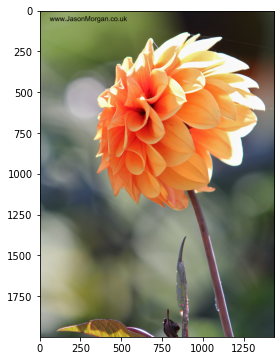

In [87]:
img = cv2.imread("/content/f.jpg")

plt.figure(figsize=(10, 6))
plt.imshow (cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

# Image Inversion:

In [ ]:
imagem = cv2.bitwise_not(img)

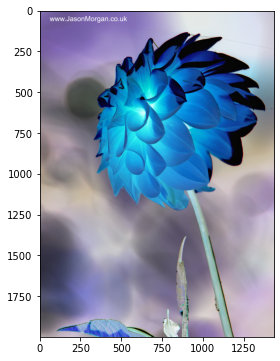

In [88]:
plt.figure(figsize=(10, 6))
plt.imshow (cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB))
plt.show()

# Histogram using python

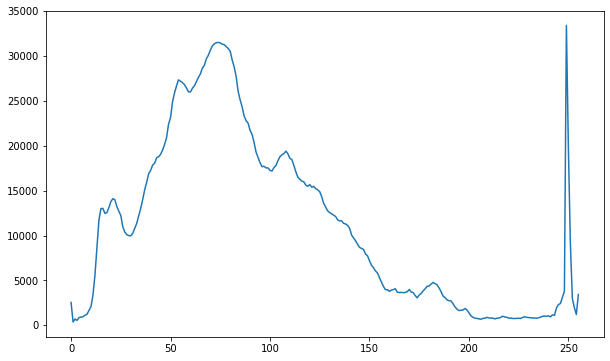

In [89]:
histr = cv2.calcHist([img],[0],None,[256],[0,256])

plt.figure(figsize=(10, 6))
plt.plot(histr)
plt.show()

# Threshold using python

In [46]:
## Binary Thresholding
ret, img_binary = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

## Binary Inverse Thresholding
ret, img_binary_inv = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)

## Threshold to zero
ret, img_threshtozero = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO)

## Threshold to zero inverse
ret, img_threshtozero_inv = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO_INV)

## Threshold truncation
ret, img_thresh_trunc = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC)

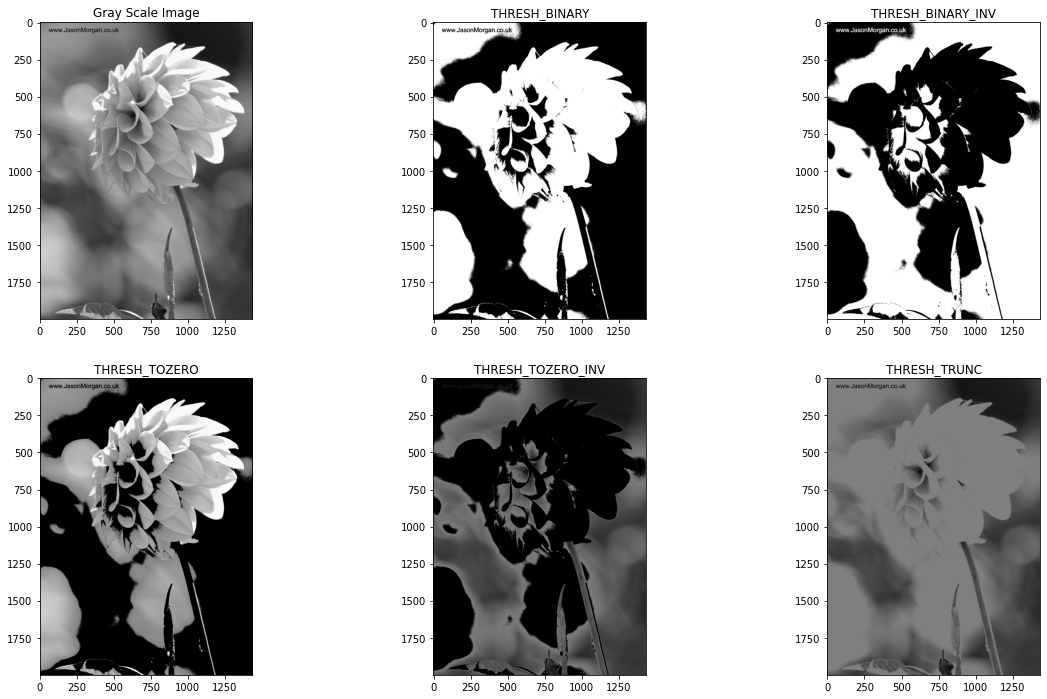

In [84]:
# Plot the images

plt.figure(figsize=(20, 12))

plt.subplot(2, 3, 1)
plt.imshow (cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Gray Scale Image")

plt.subplot(2, 3, 2)
plt.imshow (cv2.cvtColor(img_binary, cv2.COLOR_BGR2RGB))
plt.title("THRESH_BINARY")

plt.subplot(2, 3, 3)
plt.imshow (cv2.cvtColor(img_binary_inv, cv2.COLOR_BGR2RGB))
plt.title("THRESH_BINARY_INV")

plt.subplot(2, 3, 4)
plt.imshow (cv2.cvtColor(img_threshtozero, cv2.COLOR_BGR2RGB))
plt.title("THRESH_TOZERO")

plt.subplot(2, 3, 5)
plt.imshow (cv2.cvtColor(img_threshtozero_inv, cv2.COLOR_BGR2RGB))
plt.title("THRESH_TOZERO_INV")

plt.subplot(2, 3, 6)
plt.imshow (cv2.cvtColor(img_thresh_trunc, cv2.COLOR_BGR2RGB))
plt.title("THRESH_TRUNC")

plt.show()

# Bit Plane Slicing

In [56]:
psnr=10*np.log10((255*255)/(1/(225*225)*np.sum(img)*np.sum(img)))
print('PSNR is: ',psnr)

PSNR is:  -75.74249252492952


In [57]:
def cov_binary(num):
    binary_num = [int(i) for i in list('{0:0b}'.format(num))]
    for j in range(8 - len(binary_num)):
        binary_num.insert(0,0)        
    return binary_num
def conv_decimal(listt):
    x = 0
    for i in range(8):
        x = x + int(listt[i])*(2**(7-i))
    return x
def discriminate_bit(bit,img):
    z = np.zeros([225,225])
    for i in range(225):
        for j in range(225):
            x = cov_binary(img[i][j])
            for k in range(8):
                if k == bit:
                    x[k] = x[k]
                else:
                    x[k] = 0
            x1 = conv_decimal(x)
            z[i][j] = x1
    return z

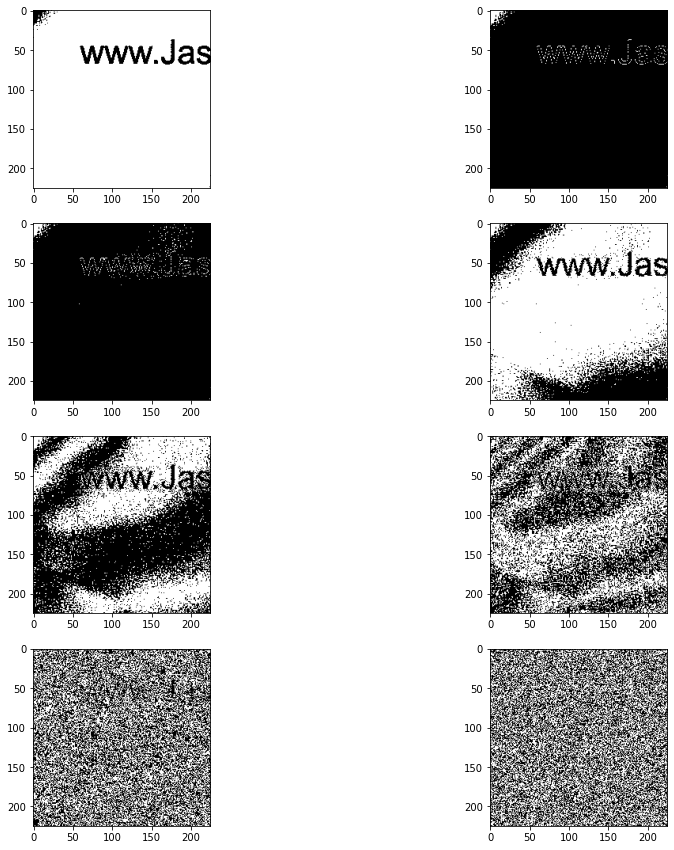

In [58]:
# Bit Plane Slicing Output

## set up side-by-side image display

fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

for i in range(1,9):
    fig.add_subplot(4,2,i)
    plt.imshow(discriminate_bit(i-1,img), cmap='gray')


plt.show(block=True)

# Contrast Stretching

In [61]:
# Method to process the red band of the image
def normalizeRed(intensity):
    iI      = intensity
    minI    = 86
    maxI    = 230
    minO    = 0
    maxO    = 255
    iO      = (iI-minI)*(((maxO-minO)/(maxI-minI))+minO)
    return iO


# Method to process the green band of the image
def normalizeGreen(intensity):
    iI      = intensity
    minI    = 90
    maxI    = 225
    minO    = 0
    maxO    = 255
    iO      = (iI-minI)*(((maxO-minO)/(maxI-minI))+minO)
    return iO


# Method to process the blue band of the image
def normalizeBlue(intensity):
    iI      = intensity
    minI    = 100
    maxI    = 210
    minO    = 0
    maxO    = 255
    iO      = (iI-minI)*(((maxO-minO)/(maxI-minI))+minO)
    return iO

In [ ]:
# Create an image object

from PIL import Image
imageObject = Image.open("/content/f.jpg")

In [ ]:
# Split the red, green and blue bands from the Image

multiBands = imageObject.split()

In [ ]:
# Apply point operations that does contrast stretching on each color band

normalizedRedBand      = multiBands[0].point(normalizeRed)
normalizedGreenBand    = multiBands[1].point(normalizeGreen)
normalizedBlueBand     = multiBands[2].point(normalizeBlue)

In [ ]:
# Create a new image from the contrast stretched red, green and blue brands

normalizedImage = Image.merge("RGB", (normalizedRedBand, normalizedGreenBand, normalizedBlueBand))

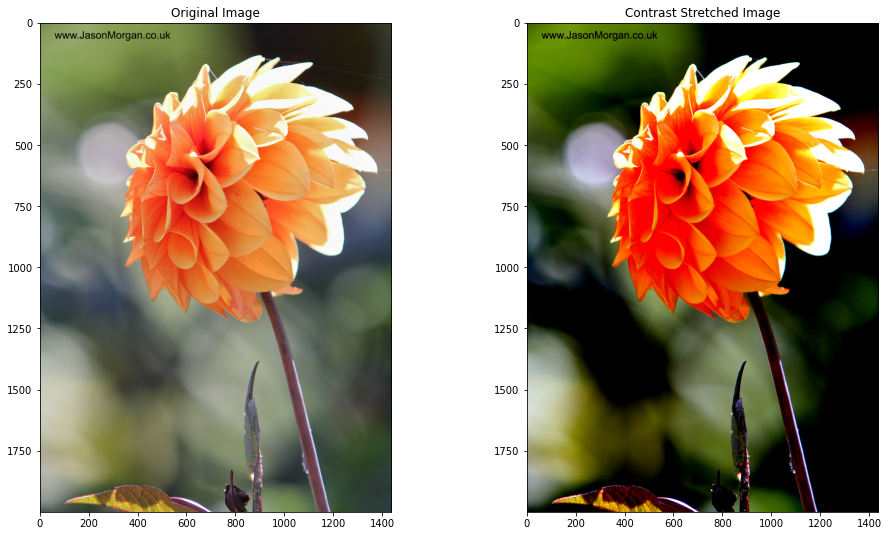

In [90]:
plt.figure(figsize=(16, 9))

plt.subplot(1, 2, 1)
plt.imshow (imageObject)
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow (normalizedImage)
plt.title("Contrast Stretched Image")

plt.show()

# Edge Detection

In [93]:
# Convert to graycsale

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [94]:
# Blur the image for better edge detection

img_blur = cv2.GaussianBlur(img_gray, (3,3), 0)

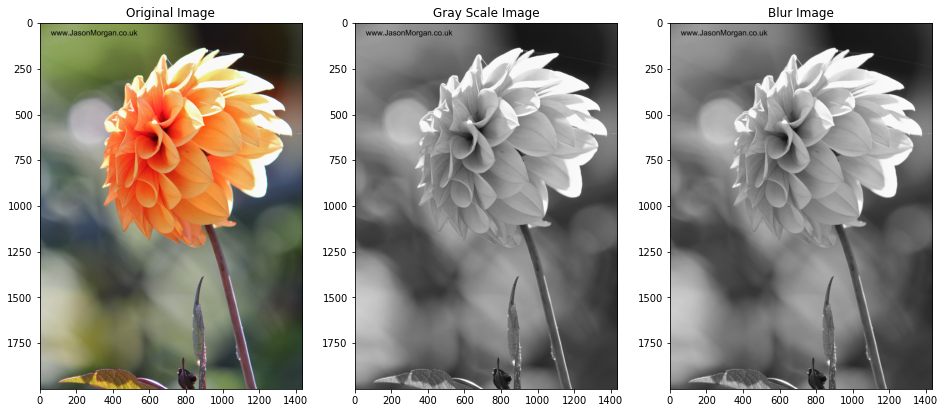

In [96]:
plt.figure(figsize=(16, 9))

plt.subplot(1, 3, 1)
plt.imshow (cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original Image")

plt.subplot(1, 3, 2)
plt.imshow (cv2.cvtColor(img_gray, cv2.COLOR_BGR2RGB))
plt.title("Gray Scale Image")

plt.subplot(1, 3, 3)
plt.imshow (cv2.cvtColor(img_blur, cv2.COLOR_BGR2RGB))
plt.title("Blur Image")

plt.show()

In [97]:
# Sobel Edge Detection

sobelx = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) # Sobel Edge Detection on the X axis
sobely = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5) # Sobel Edge Detection on the Y axis
sobelxy = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5) # Combined X and Y Sobel Edge Detection

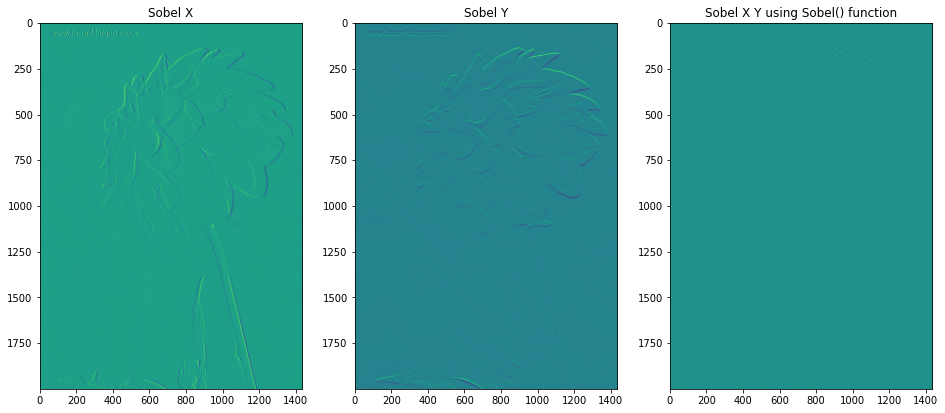

In [101]:
# Display Sobel Edge Detection Images

plt.figure(figsize=(16, 9))

plt.subplot(1, 3, 1)
plt.imshow (sobelx)
plt.title("Sobel X")

plt.subplot(1, 3, 2)
plt.imshow (sobely)
plt.title("Sobel Y")

plt.subplot(1, 3, 3)
plt.imshow (sobelxy)
plt.title("Sobel X Y using Sobel() function")

plt.show()

In [102]:
# Canny Edge Detection

edges = cv2.Canny(image=img_blur, threshold1=100, threshold2=200)

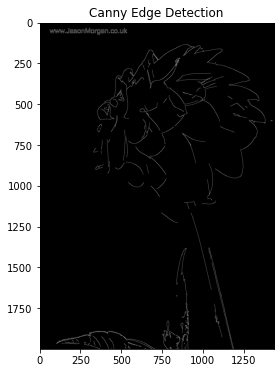

In [103]:
# Display Canny Edge Detection Image

plt.figure(figsize=(10, 6))
plt.imshow (cv2.cvtColor(edges, cv2.COLOR_BGR2RGB))
plt.title("Canny Edge Detection")
plt.show()